# Pymaceuticals Inc.
---

### Analysis

The data below examine tumor size in mice in one of ten different treatment conditions over time. One mouse in the Infubinol group had an unusually small tumor. Additionally, one mouse had duplicate data, which were removed before analysis.

Examination of the boxplots suggests that mice in the Ramicane and Capomulin had the smallest tumors at the end of the study. It should be noted, though, that these two regimens also had the largest number of observations. 

Additional analyses focusing on mice just in the Capomulin group suggest that there is a strong association between mouse weight and tumor size, with over 70% of the variance in tumor size being explained by mouse weight.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [30]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [31]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeat = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
pd.unique(repeat['Mouse ID'])

array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
repeat_mouse = combined_df.loc[combined_df['Mouse ID'] == "g989"]
repeat_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined_df.loc[combined_df['Mouse ID'] != "g989"]
clean.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [35]:
# Checking the number of mice in the clean DataFrame.
len((clean['Mouse ID']).unique())

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean.groupby(by=["Drug Regimen"])[["Tumor Volume (mm3)"]].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].mean()
med_tumor = clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor, 
                           "Median Tumor Volume": med_tumor, 
                           "Tumor Volume Variance": var_tumor, 
                           "Tumor Volume Std. Dev.": std_tumor, 
                           "Tumor Volume Std. Err.": sem_tumor})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary2_df = clean.groupby(by = ["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary2_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [43]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
#get dataframe with drug regimen and mouse count data
drug_mouse = clean[["Drug Regimen", "Mouse ID"]]

#get counts of how many mice each drug has
drug_mouse_group = drug_mouse["Drug Regimen"].value_counts()
drug_mouse_df = pd.DataFrame(drug_mouse_group)

#rename durg regimen columnt to mouse count
drug_mouse_graph = pd.DataFrame(drug_mouse_df.rename(columns = {"Drug Regimen": "Mouse Count"}))
drug_mouse_graph.head()


,Mouse Count
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


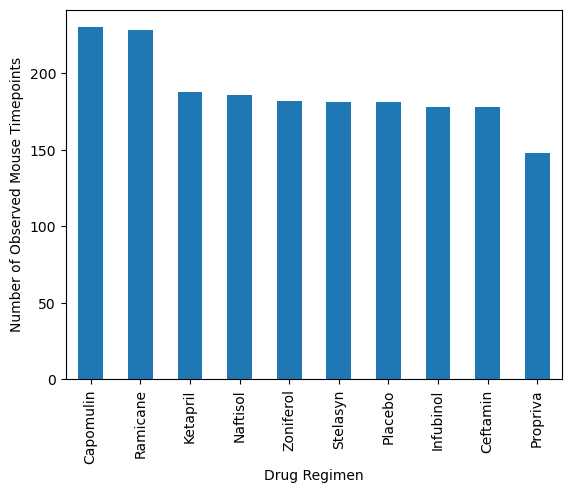

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#update dataframe so that data needed for graph are not in index
graph_data = pd.DataFrame({"Drug Regimen": drug_mouse_graph.index,
                          "Mouse Count": drug_mouse_graph["Mouse Count"]})

num_mouse_graph = graph_data.plot(kind = "bar", x = "Drug Regimen", y = "Mouse Count", legend = False)
num_mouse_graph.set_xlabel("Drug Regimen")
num_mouse_graph.set_ylabel("Number of Observed Mouse Timepoints")
plt.show()

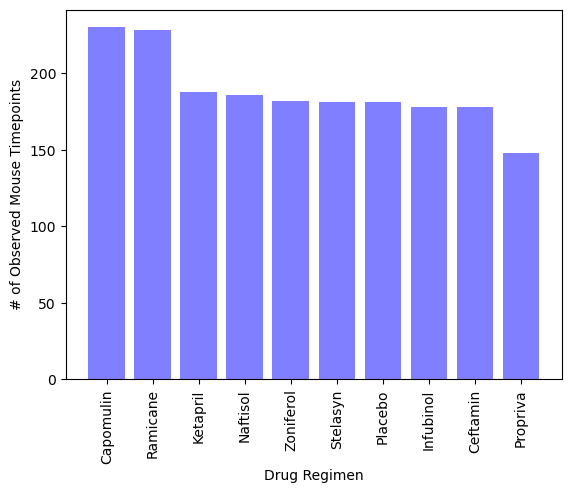

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_mouse_graph.index
y_axis = drug_mouse_graph["Mouse Count"]
plt.bar(x_axis, y_axis, color = "b", alpha = 0.5, align = "center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

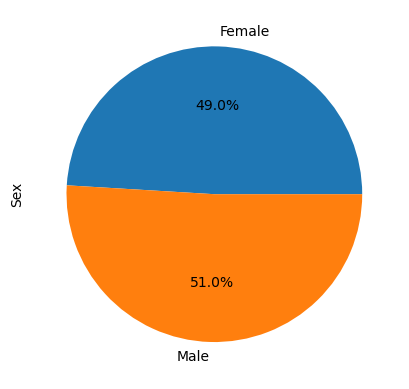

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean.groupby(['Sex']).count()
#sex.head()
sex.plot(kind = 'pie', y = 'Mouse ID', autopct = "%.1f%%", legend = False)
plt.ylabel("Sex")
plt.show()

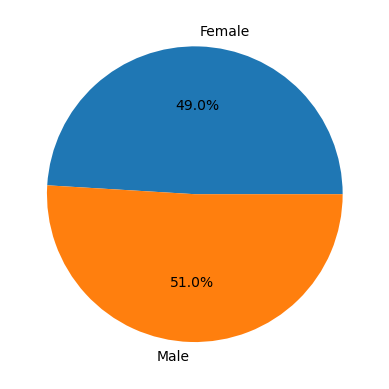

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex["Mouse ID"], labels = sex.index, autopct = '%1.1f%%')
#set_ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last = clean.groupby(by = "Mouse ID")["Timepoint"].max()
last.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_data = pd.merge(last, clean, on = ["Mouse ID", "Timepoint"])
last_data_updated = last_data.rename(columns = {"Timepoint": "Max Timepoint"})
last_data_updated.head()

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = last_data_updated["Drug Regimen"].unique()
#treatments

# Create empty list to fill with tumor vol data (for plotting)
#I created the list, but I confess I don't understand the plan for this
tumor_plot=[]

#get descriptives by treatment
describe_by_drug = last_data_updated.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
describe_by_drug


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939
Propriva,24.0,56.493884,8.415626,45.000000,49.119739,55.591622,62.689368,72.455421
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690


In [253]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

    
    # Determine outliers using upper and lower bounds
    #I did this a bit differently, by creating a table - below - with each drug and the IQR. 
    #I then used the original table of information to flag outliers


In [171]:
#listing treatments to make sure order matches with list of bottom 25% below
treatments

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [170]:
#create a list of bottom 25% values
quar25 = []

for y in treatments:
    q = describe_by_drug.loc[y][4]
    quar25.append(q)

quar25

[54.04860769,
 52.94290169,
 48.72207785,
 52.476595617499996,
 49.98830246,
 31.56046955,
 56.72009545,
 49.11973915,
 52.07951009,
 32.37735684]

In [173]:
#create a list of top 25% values
quar75 = []

for u in treatments:
    u = describe_by_drug.loc[u][6]
    quar75.append(u)

quar75

[65.52574285,
 68.13428817,
 64.29983003,
 69.1039444025,
 66.79415599,
 40.65900627,
 69.87225079,
 62.689368072499995,
 69.56362076,
 40.1592203]

In [177]:
#put treatments, bottom, top quartile into dataframe
outlier = pd.DataFrame({"Treatment": treatments,
                       "Bottom quartile": quar25,
                       "Top quartile": quar75})

#add interquartile range column
outlier["IQR"] = outlier["Top quartile"] - outlier["Bottom quartile"]

outlier.head()

,Treatment,Bottom quartile,Top quartile,IQR
0,Infubinol,54.048608,65.525743,11.477135
1,Placebo,52.942902,68.134288,15.191386
2,Ceftamin,48.722078,64.299830,15.577752
3,Stelasyn,52.476596,69.103944,16.627349
4,Zoniferol,49.988302,66.794156,16.805854


In [179]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#step 1: determine cutoffs
outlier["bottom cutoff"] = outlier["Bottom quartile"] - (1.5*outlier["IQR"])
outlier["top cutoff"] = outlier["Top quartile"] + (1.5*outlier["IQR"])

#outliers are below bottom cutoff or above top cutoff
outlier

,Treatment,Bottom quartile,Top quartile,IQR,bottom cutoff,top cutoff
0,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
1,Placebo,52.942902,68.134288,15.191386,30.155822,90.921368
2,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458
3,Stelasyn,52.476596,69.103944,16.627349,27.535572,94.044968
4,Zoniferol,49.988302,66.794156,16.805854,24.779522,92.002936
5,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
6,Ketapril,56.720095,69.872251,13.152155,36.991862,89.600484
7,Propriva,49.119739,62.689368,13.569629,28.765296,83.043811
8,Naftisol,52.079510,69.563621,17.484111,25.853344,95.789787
9,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015


In [228]:
#step 2: merge outliers into final tumor size data
#rename drug regimen to treatment

last_data2 = last_data_updated.rename(columns = {"Drug Regimen": "Treatment"})

last_data2.head()

#combine outlier dataframe and data dataframe
last_with_outlier = pd.merge(last_data2, outlier, on = "Treatment")
#last_with_outlier.head()

#add column about whether there is an outlier
#last_with_outlier["Outlier YN"] = "yes" if (last_with_outlier["Tumor Volume (mm3)"] < last_with_outlier["bottom cutoff"]) else "no"
last_with_outlier["Outlier YN"] = np.where((last_with_outlier["Tumor Volume (mm3)"] < last_with_outlier["bottom cutoff"]) | (last_with_outlier["Tumor Volume (mm3)"] > last_with_outlier["top cutoff"]), "yes", "no")

#find out whether there are any outliers
last_with_outlier["Outlier YN"].value_counts()



no     247
yes      1
Name: Outlier YN, dtype: int64

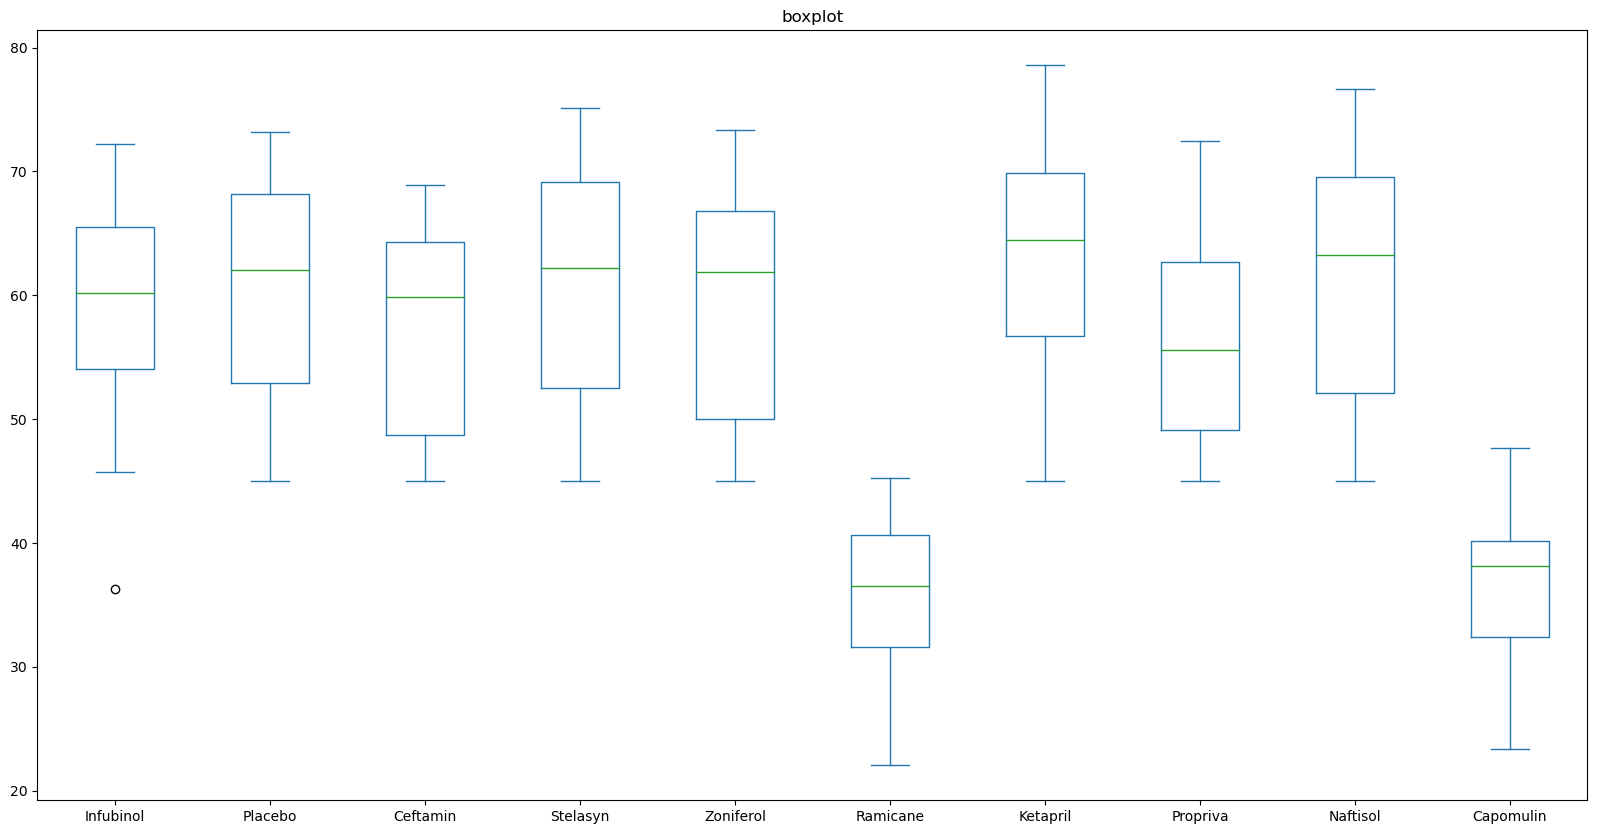

In [279]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#This felt a bit repetitive. I tried to do a for
    #for t in treatments:
        #t = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == t])
#however, i think this just gave me dataframes named "t"

drug_1_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Infubinol"])
drug_2_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Placebo"])
drug_3_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Ceftamin"])
drug_4_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Stelasyn"])
drug_5_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Zoniferol"])
drug_6_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Ramicane"])
drug_7_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Ketapril"])
drug_8_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Propriva"])
drug_9_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Naftisol"])
drug_10_tumor = pd.DataFrame(last_data_updated.loc[last_data_updated["Drug Regimen"] == "Capomulin"])



data = pd.DataFrame({"Infubinol": drug_1_tumor["Tumor Volume (mm3)"], 
                    "Placebo": drug_2_tumor["Tumor Volume (mm3)"],
                    "Ceftamin": drug_3_tumor["Tumor Volume (mm3)"],
                    "Stelasyn": drug_4_tumor["Tumor Volume (mm3)"],
                    "Zoniferol": drug_5_tumor["Tumor Volume (mm3)"],
                    "Ramicane": drug_6_tumor["Tumor Volume (mm3)"],
                    "Ketapril": drug_7_tumor["Tumor Volume (mm3)"],
                    "Propriva": drug_8_tumor["Tumor Volume (mm3)"],
                    "Naftisol": drug_9_tumor["Tumor Volume (mm3)"],
                    "Capomulin": drug_10_tumor["Tumor Volume (mm3)"]})

ax = data[['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 
           'Capomulin']].plot(kind = 'box', title = 'boxplot', figsize = (20,10))

plt.show()

## Line and Scatter Plots

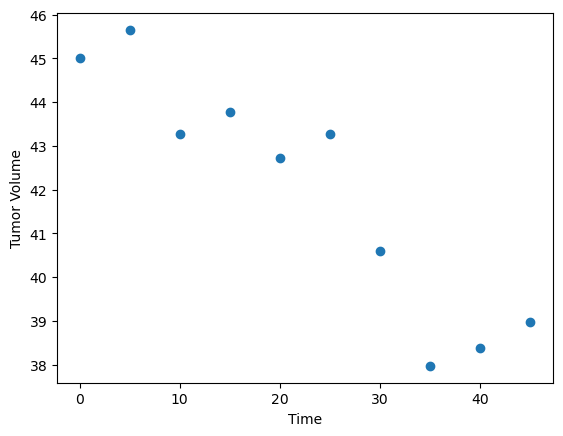

In [291]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128 = clean.loc[clean['Mouse ID'] == "b128"]

plt.scatter(b128["Timepoint"], b128["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.show()

Text(0, 0.5, 'Weight')

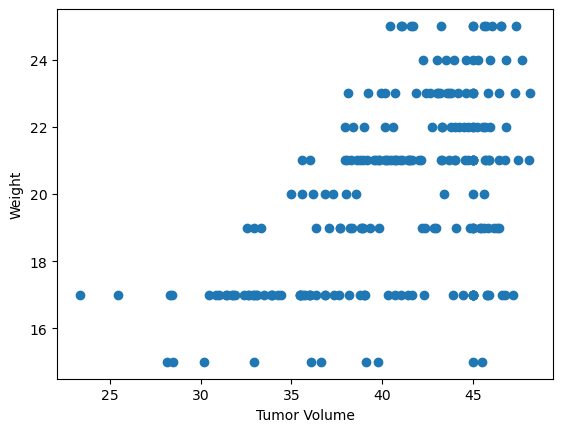

In [292]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_all = clean.loc[clean['Drug Regimen'] == "Capomulin"]
plt.scatter(capomulin_all["Tumor Volume (mm3)"], capomulin_all["Weight (g)"])
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")

## Correlation and Regression

In [300]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_av_tumor = capomulin_all.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_av_weight = capomulin_all.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_tumor_weight = pd.DataFrame({"Average Tumor Volume (mm3)": capomulin_av_tumor,
                                      "Average weight": capomulin_av_weight})

correlation_tumor_weight = st.pearsonr(capomulin_tumor_weight["Average Tumor Volume (mm3)"], 
                                       capomulin_tumor_weight["Average weight"])

print(f"The correlation between average mouse weight and average tumor size is {round(correlation_tumor_weight[0], 2)}")

The correlation between average mouse weight and average tumor size is 0.84


The r-squared is: 0.7088568047708723


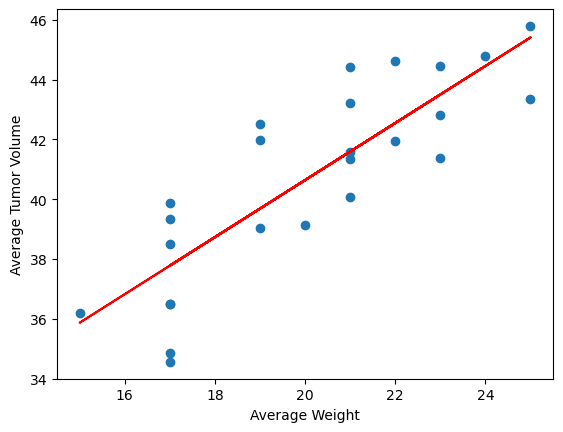

In [302]:
#linear regression
#import dependencies
from scipy.stats import linregress


x_values = capomulin_tumor_weight["Average weight"]
y_values = capomulin_tumor_weight["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()